In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize'] = (10,6) # Setting figure size

In [3]:
# Selecting 'inline' mpl backend
%matplotlib inline 

In [4]:
np.random.seed(0) # Setting random seed

In [5]:
# Pandas jupyter-notebook display adjustments
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Collaborative_Review_Assignment_04 instructions:
1. Visually analyze the covariance between various factors and identify the variance explained in principle components of these factors. Next, consider the ACF and PACF of the process and its square.
2. Using PCA provide a 2-dimensional representation of the weight-space of a set of linear models representing the covariance between our factors and the different benchmark portfolios. Comment on the distribution of the benchmark portfolios across the weight-space.
3. Using linear regression test for the significance of these factors, as per the original work of Fama and French, under the equation: $$\text{E[Returns]}_i=r_f+\beta_1(r_m-r_f)_i+\beta_2\text{HML}_i+\beta_3\text{RMW}_i+\beta_4\text{CMA}_i+\epsilon_i$$

##### Downloading Fama-French portfolio and Factors

In [6]:
portfolios = web.DataReader(name='100_Portfolios_10x10_Daily', data_source='famafrench')[0]
portfolios.index = pd.to_datetime(arg=portfolios.index,yearfirst=True)

In [7]:
factors = web.DataReader(name='F-F_Research_Data_5_Factors_2x3_daily', data_source='famafrench')[0]
factors.index = pd.to_datetime(arg=factors.index, yearfirst=True)

In [8]:
factors.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-04,1.69,0.75,1.12,-0.22,0.21,0.0
2010-01-05,0.31,-0.37,1.22,-0.11,0.18,0.0
2010-01-06,0.13,-0.16,0.52,-0.03,0.20,0.0
2010-01-07,0.40,0.24,0.94,-0.62,0.23,0.0
2010-01-08,0.33,0.34,0.01,0.25,-0.38,0.0


The above sample of factors indicate that these values are already standardized.

##### Principal component analysis
The first task requires us to visually analyze the covariance between various factors and identify the variance 

            Mkt-RF          SMB          HML          RMW          CMA           RF
count  2245.000000  2245.000000  2245.000000  2245.000000  2245.000000  2245.000000
mean      0.052588     0.001764    -0.006281     0.004468     0.001831     0.001265
std       0.960108     0.518713     0.490026     0.342095     0.300382     0.002198
min      -6.970000    -1.990000    -1.830000    -1.660000    -1.320000     0.000000
25%      -0.360000    -0.330000    -0.310000    -0.200000    -0.180000     0.000000
50%       0.070000     0.000000    -0.030000     0.000000     0.000000     0.000000
75%       0.530000     0.320000     0.260000     0.200000     0.160000     0.001000
max       4.970000     3.630000     2.380000     1.670000     1.970000     0.008000


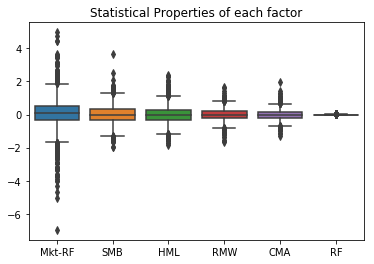

In [9]:
print(f"{factors.describe()}")
print("="*80)
sns.boxplot(data=factors);
plt.title('Statistical Properties of each factor')
plt.show()

The values appear to be fairly normalized.<br> Plus the factors in the dataset are arranged in descending order of their variability. 

In [11]:
components = PCA(n_components=2) # Instantiating PCA object

scaled_data = components.fit_transform(factors.T) # fitting and transforming the factors dataset

# PCA matrix to dataframe
p_components = pd.DataFrame(data=scaled_data, columns=['comp_1', 'comp_2'], index=factors.columns.tolist())

# Explained variances
print(f"{components.explained_variance_ratio_}")
print("="*80)
# PCA correlation matrix
p_components

[0.61890635 0.18433123]


,comp_1,comp_2
Mkt-RF,37.475606,-3.021320
SMB,2.561913,17.099511
HML,-6.237577,-14.833955
RMW,-16.393485,3.339011
CMA,-10.080019,-4.613050
RF,-7.326439,2.029803


1. component 1 contributes ~62% of the variance, whereas component 2 contributes additional 18%.
2. For component 1, market excess returns factor has the highest covariance.
3. For component 2, small - big factor has highest covariance.

##### ACF and PACF of componts 1 & 2

In [12]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [13]:
# fig = plt.figure(figsize=(10,6))
# ax1 = fig.add_subplot(2,2,1)
# plot_acf(x=p_components.comp_1, lags=30, ax=ax1, title='ACF: comp_1');
# ax2 = fig.add_subplot(2,2,3)
# plot_acf(x=p_components.comp_2, lags=30, ax=ax2, title='ACF: comp_2');
# ax3 = fig.add_subplot(2,2,2)
# plot_pacf(x=p_components.comp_2, lags=30, ax=ax3, title='PACF: comp_1');
# ax4 = fig.add_subplot(2,2,4)
# plot_pacf(x=p_components.comp_2, lags=30, ax=ax4, title='PACF: comp_2');
# plt.tight_layout(True)
# plt.show()

In [14]:
# sns.scatterplot(x=p_components.comp_1, y=p_components.comp_2, hue=p_components.index, sizes=p_components.comp_1*p_components.comp_2);
# plt.legend(title=None, frameon=False)
# plt.show()

##### Covarince among the linear-models: 
a 2-dimensional representation of the weight-space of a set of linear models representing the covariance between our factors and the different benchmark portfolios

In [25]:
df = pd.merge(left=factors, right=portfolios, how='inner', left_index=True, right_index=True)
X = df[factors.columns.tolist()]
y = df[portfolios.columns.tolist()]

In [26]:
# Instantiate a linear model
model = LinearRegression()

# Fit the model to X and y defined above
model.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
a = pd.DataFrame(data=model.coef_, columns=X.columns.tolist(), index=portfolios.columns.tolist())

In [29]:
a.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
SMALL LoBM,0.886885,0.982687,-0.379258,-0.765085,-0.020467,1.324348
ME1 BM2,0.799846,0.952499,-0.446878,-0.816099,-0.130889,7.442087
ME1 BM3,0.847979,1.007407,-0.273488,-0.635630,-0.211982,-8.064686
ME1 BM4,0.799214,0.995843,-0.313787,-0.683673,-0.053782,-6.332855
ME1 BM5,0.791704,0.980896,-0.076434,-0.341495,0.033157,-7.554710


/home/neelkanth/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


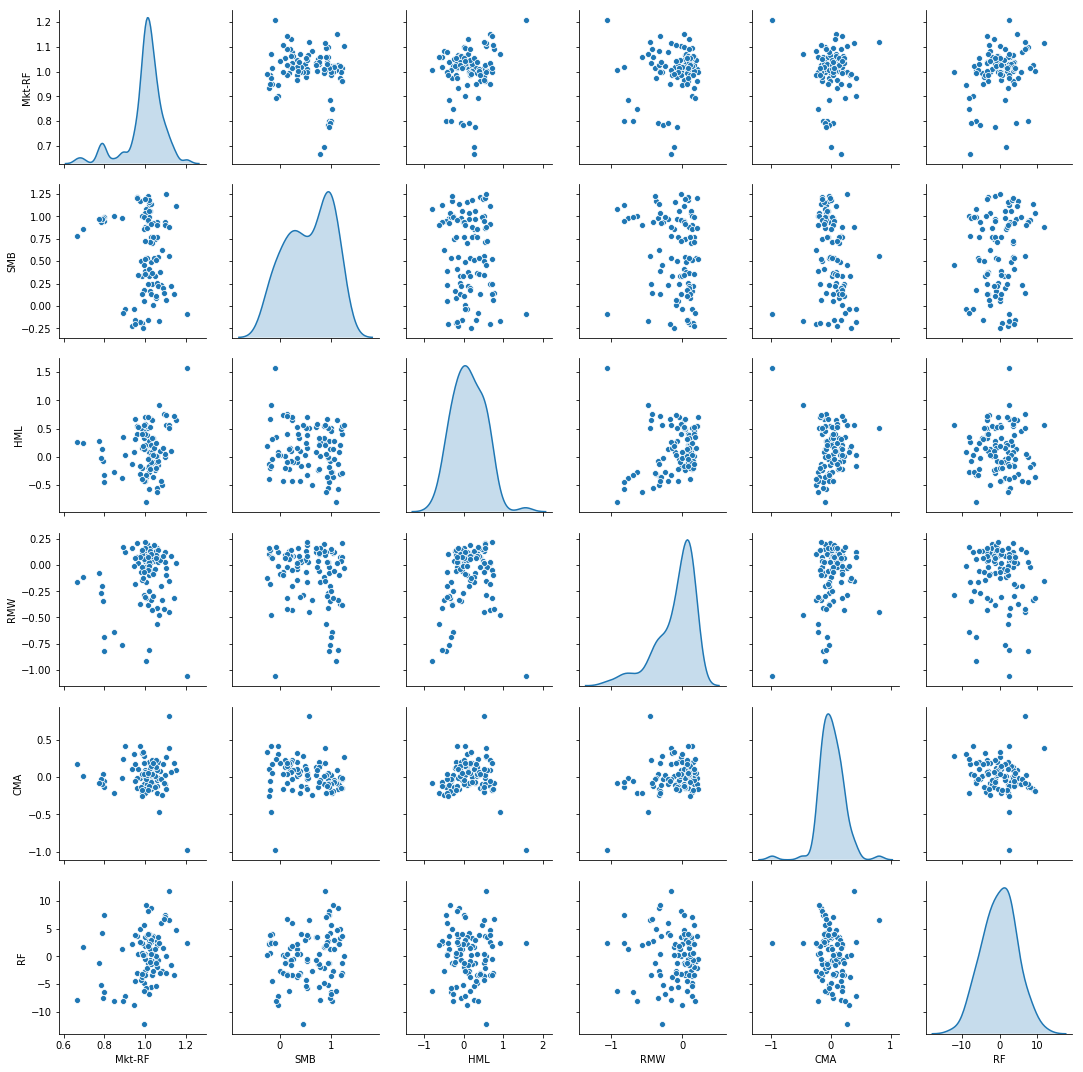

In [41]:
plt.rcParams['figure.figsize'] = [10,6]
sns.pairplot(data=a,diag_kind='kde', kind='scatter', markers='o');
# sns.scatterplot(y='Mkt-RF', x='SMB', data=a);
# sns.scatterplot(y='DTWEXB', x='DTB3', data=a);
# plt.xticks(rotation=90)
plt.show()

##### Linear model fit for Fama-French 5-factor model

In [42]:
from statsmodels.regression.linear_model import OLS

In [ ]:
OLS(endog=)